In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the dataset
df=pd.read_csv('cubic_zirconia.csv')

In [4]:
# top 5 rows
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## ------------------------     Question1 : EDA (Exploratory Data Analysis) ------------------------------------

## EDA (Exploratory Data Analysis)

In [5]:
# shape of the dataset
df.shape
print(' The number of columns (variables) in the dataset is',df.shape[1],'\n'
,'The number of rows (observations per variable) in the dataset is',df.shape[0])

 The number of columns (variables) in the dataset is 11 
 The number of rows (observations per variable) in the dataset is 26967


In [6]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
#drop first column (Unnamed: 0) which is not required
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Let's Check duplicate values in the dataset

In [9]:
## check duplicates in the dataset
df_duplicate = df.duplicated()
print('There are',df_duplicate.sum(), 'records in the dataset which are duplicates')

There are 34 records in the dataset which are duplicates


In [10]:
## Removing 34 duplicates records from the dataset and saving final records in df_new dataset.
df_new = df.drop_duplicates()

In [11]:
# shape of the dataset
df_new.shape
print(' The number of columns (variables) in the dataset is',df_new.shape[1],'\n'
,'The number of rows (observations per variable after removing duplicates) in the dataset is',df_new.shape[0])

 The number of columns (variables) in the dataset is 10 
 The number of rows (observations per variable after removing duplicates) in the dataset is 26933


### Let's Check missing values in the dataset

In [12]:
## check is there any null data in the dataset
df_new.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are __697 rows (i.e. ~2.6%) where depth column values are null__.

#### There are different ways to replace null values of depth. We performed some web research on the factors on which the depth of zirconia is dependent (attached in along with the Business Report submission) and came up with two possibly better approaches for imputation VS simply replacing NULL with median or mean of the depth, in general. 

__Approach 1:__
    - merge three columns (i.e. cut, color and clarity)
    - take the mean of that
    - replace null values with the mean values of these combination

Refer below codes for details

In [13]:
#create the copy of df_new dataset and name it as "df_replace"
df_replace = df_new.copy()

In [14]:
#merge 3 col (cut, color and clarity) based on these three parameter we will find the mean and replace the null values.
merge_col = df_replace['cut'] + df_replace['color'] + df_replace['clarity']

In [15]:
# save merge_col value into df_replace dataset
df_replace['merge_col'] = merge_col

In [16]:
#check whether the column is added into the dataset or not?
df_replace.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,merge_col
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,IdealESI1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,PremiumGIF
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,Very GoodEVVS2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,IdealFVS1
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,IdealFVVS1


In [17]:
# using group by function replace null values of "merge_col" combination with 
# the mean depth value of "merge_col".
df_replace['depth']=df_replace.groupby('merge_col')['depth'].apply(lambda x:x.fillna(x.mean()))

In [18]:
## check is there any null data in the dataset
df_replace.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth        1
table        0
x            0
y            0
z            0
price        0
merge_col    0
dtype: int64

In [19]:
##df_replace.to_excel('temp.xlsx')

We could still see there is __one row__ which has null depth value.

__Approach 2:__
    - merge three columns (i.e. cut and clarity)
    - take the mean of that
    - replace mean values of that with remaining null values of above combination

Refer below codes for details

In [20]:
#merge 2 col (cut and clarity) based on these three parameter we will find the mean and replace the null values.
merge_col2 = df_replace['cut'] + df_replace['clarity']

In [21]:
# save merge_col2 value into df_replace dataset
df_replace['merge_col2'] = merge_col2

In [22]:
#check whether the column is added into the dataset or not?
df_replace.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,merge_col,merge_col2
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,IdealESI1,IdealSI1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,PremiumGIF,PremiumIF
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,Very GoodEVVS2,Very GoodVVS2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,IdealFVS1,IdealVS1
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,IdealFVVS1,IdealVVS1


In [23]:
# using group by function replace null values of "merge_col2" combination with 
# the mean depth value of "merge_col2".
df_replace['depth']=df_replace.groupby('merge_col2')['depth'].apply(lambda x:x.fillna(x.mean()))

In [24]:
## check is there any null data in the dataset
df_replace.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
merge_col     0
merge_col2    0
dtype: int64

In [25]:
##df_replace.to_excel('temp1.xlsx')

#### Further, let's check is there any ZERO values in the numerical variables columns.

In [26]:
# any of the column in the dataset has the "ZERO" value or not?
(df_replace == 0).sum(axis=0)

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             2
y             2
z             8
price         0
merge_col     0
merge_col2    0
dtype: int64

There are __3 columns (x,y and z) have ZERO values__ in the dataset. Where x,y,z represents the length, widith and height of the cubic zirconia respectively.

Let's take alike approach as above to replace zero values.

__Approach1:__
    - merge four columns (i.e. carat,cut, color and clarity)
    - take the mean of that
    - replace mean values of these with null values of above combination

Refer below codes for details

In [27]:
#convert carat float type into string
df_replace['carat'] = df_replace['carat'].astype(str)

In [28]:
#merge 4 col (carat,cut, color and clarity) based on these four parameter we will find the mean and replace the null values.
merge_col3 = df_replace['carat'] + df_replace['cut'] + df_replace['color'] + df_replace['clarity']

In [29]:
# save merge_col3 value into df_replace dataset
df_replace['merge_col3'] = merge_col3

In [30]:
df_replace.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,merge_col,merge_col2,merge_col3
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,IdealESI1,IdealSI1,0.3IdealESI1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,PremiumGIF,PremiumIF,0.33PremiumGIF
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,Very GoodEVVS2,Very GoodVVS2,0.9Very GoodEVVS2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,IdealFVS1,IdealVS1,0.42IdealFVS1
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,IdealFVVS1,IdealVVS1,0.31IdealFVVS1


In [31]:
df_replace['x'] = df['x'].replace(0, np.nan)
df_replace['y'] = df['y'].replace(0, np.nan)
df_replace['z'] = df['z'].replace(0, np.nan)

In [32]:
# using group by function replace null values of "merge_col3" combination with 
# the mean x,y,z value of "merge_col3".
df_replace['x']=df_replace.groupby('merge_col3')['x'].apply(lambda x:x.fillna(x.mean()))
df_replace['y']=df_replace.groupby('merge_col3')['y'].apply(lambda x:x.fillna(x.mean()))
df_replace['z']=df_replace.groupby('merge_col3')['z'].apply(lambda x:x.fillna(x.mean()))

In [33]:
df_replace.to_excel('temp2.xlsx')

In [34]:
## check is there any null data in the dataset
df_replace.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             1
y             1
z             3
price         0
merge_col     0
merge_col2    0
merge_col3    0
dtype: int64

We could still see __5 values__ which has ZERO values in the dataset.

__Approach2:__
    - merge three columns (i.e. carat, color and clarity)
    - take the mean of that
    - replace mean values of these with null values of above combination

Refer below codes for details

In [35]:
#merge 3 col (carat, color and clarity) based on these three parameter we will find the mean and replace the null values.
merge_col4 = df_replace['carat'] + df_replace['color'] + df_replace['clarity']

In [36]:
# save merge_col3 value into df_replace dataset
df_replace['merge_col4'] = merge_col4

In [37]:
df_replace.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,merge_col,merge_col2,merge_col3,merge_col4
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,IdealESI1,IdealSI1,0.3IdealESI1,0.3ESI1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,PremiumGIF,PremiumIF,0.33PremiumGIF,0.33GIF
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,Very GoodEVVS2,Very GoodVVS2,0.9Very GoodEVVS2,0.9EVVS2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,IdealFVS1,IdealVS1,0.42IdealFVS1,0.42FVS1
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,IdealFVVS1,IdealVVS1,0.31IdealFVVS1,0.31FVVS1


In [38]:
# using group by function replace null values of "merge_col4" combination with 
# the mean x,y,z value of "merge_col4".
df_replace['x']=df_replace.groupby('merge_col4')['x'].apply(lambda x:x.fillna(x.mean()))
df_replace['y']=df_replace.groupby('merge_col4')['y'].apply(lambda x:x.fillna(x.mean()))
df_replace['z']=df_replace.groupby('merge_col4')['z'].apply(lambda x:x.fillna(x.mean()))

In [39]:
df_replace.to_excel('temp3.xlsx')

In [40]:
## check is there any null data in the dataset
df_replace.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             1
price         0
merge_col     0
merge_col2    0
merge_col3    0
merge_col4    0
dtype: int64

We could still __one value__ as ZERO in the dataset

__Approach3:__
    - merge three columns (i.e. carat, cut and clarity)
    - take the mean of that
    - replace mean values of these with null values of above combination

Refer below codes for details

In [41]:
#merge 3 col (carat, color and clarity) based on these three parameter we will find the mean and replace the null values.
merge_col5 = df_replace['carat'] + df_replace['cut'] + df_replace['clarity']

In [42]:
# save merge_col3 value into df_replace dataset
df_replace['merge_col5'] = merge_col5

In [43]:
df_replace.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,merge_col,merge_col2,merge_col3,merge_col4,merge_col5
0,0.3,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,IdealESI1,IdealSI1,0.3IdealESI1,0.3ESI1,0.3IdealSI1
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,PremiumGIF,PremiumIF,0.33PremiumGIF,0.33GIF,0.33PremiumIF
2,0.9,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,Very GoodEVVS2,Very GoodVVS2,0.9Very GoodEVVS2,0.9EVVS2,0.9Very GoodVVS2
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,IdealFVS1,IdealVS1,0.42IdealFVS1,0.42FVS1,0.42IdealVS1
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,IdealFVVS1,IdealVVS1,0.31IdealFVVS1,0.31FVVS1,0.31IdealVVS1


In [44]:
# using group by function replace null values of "merge_col4" combination with 
# the mean z value of "merge_col5".
df_replace['z']=df_replace.groupby('merge_col5')['z'].apply(lambda x:x.fillna(x.mean()))

In [45]:
df_replace.to_excel('temp4.xlsx')

In [46]:
## check is there any null data in the dataset
df_replace.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
merge_col     0
merge_col2    0
merge_col3    0
merge_col4    0
merge_col5    0
dtype: int64

In [47]:
#convert back carat as float type
df_replace['carat'] = df_replace['carat'].astype(float)

In [48]:
df_replace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       26933 non-null  float64
 1   cut         26933 non-null  object 
 2   color       26933 non-null  object 
 3   clarity     26933 non-null  object 
 4   depth       26933 non-null  float64
 5   table       26933 non-null  float64
 6   x           26933 non-null  float64
 7   y           26933 non-null  float64
 8   z           26933 non-null  float64
 9   price       26933 non-null  int64  
 10  merge_col   26933 non-null  object 
 11  merge_col2  26933 non-null  object 
 12  merge_col3  26933 non-null  object 
 13  merge_col4  26933 non-null  object 
 14  merge_col5  26933 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 3.3+ MB


In [49]:
df = df_replace.drop(['merge_col','merge_col2','merge_col3','merge_col4','merge_col5'],axis=1)

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [51]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


### Let's Check Outliers in the dataset

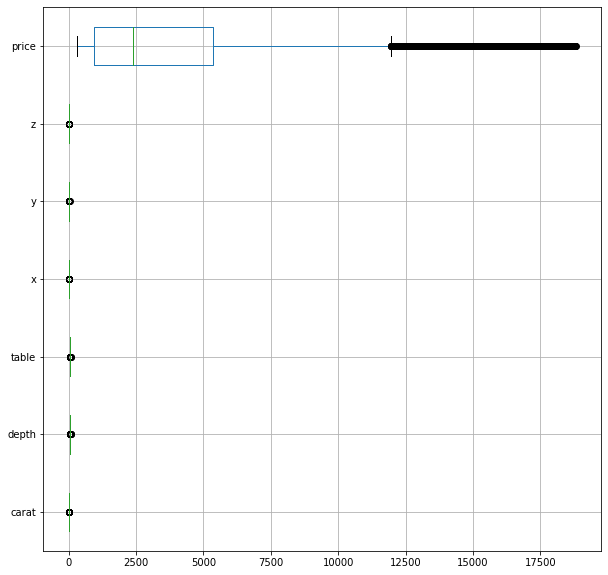

In [53]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [54]:
#df.shape

In [55]:
#plt.figure(figsize=(10,10))
#df.boxplot(vert=0)

In [56]:
# shape of the dataset
df.shape
print(' The number of columns (variables) in the dataset is',df.shape[1],'\n'
,'The number of rows (observations per variable) in the dataset is',df.shape[0])

 The number of columns (variables) in the dataset is 10 
 The number of rows (observations per variable) in the dataset is 26933


### Now, Dataset is ready for next level of inferences

__Insight1:__ 

In __"cubic zirconia"__ dataset, while doing EDA we found:

- __34 records__ were duplicate and considering the application of the dataset, we have __removed the same__. So, final no. of records would be __26933__
- __697 records__ in numeric column name __"depth"__ had the blank valued. by using __group by function__ we have replaced the null value with appropriate mean values (based on the appropriate combination, as explained above)
- Further, we found __ZERO values in col x,y,z two, two and eight records respectively__. As, these columns are numeric in nature and represents length, width and height of the cubic zirconia. We have replace these ZERO value with appropriate value. For which we used __group by function__ we have replaced the null value with appropriate mean values (based on the appropriate combination, as explained above)
- We have outliers in the dataset but __let's not remove at this point in time__.

#### Check for the basic measures of descriptive statistics

In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933.0,NaN,NaN,NaN,61.745339,1.397077,50.8,61.1,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729805,1.126301,3.73,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.73356,1.164006,3.71,4.72,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.539071,0.717594,1.07,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


__Insight2:__ By looking at the dataset, looks like there are outliers in the variables. Further,


_Numercial Variables:_

- There is a __significant gap between mean and median for price.__


_Categorical Variables:_

- _clarity_ has the _8_ unique values followed by _color with 7 and cut with 5_ unique values respectively.

### Univariate Analysis (Numerical Variables)

Text(0.5, 1.0, 'price boxplot')

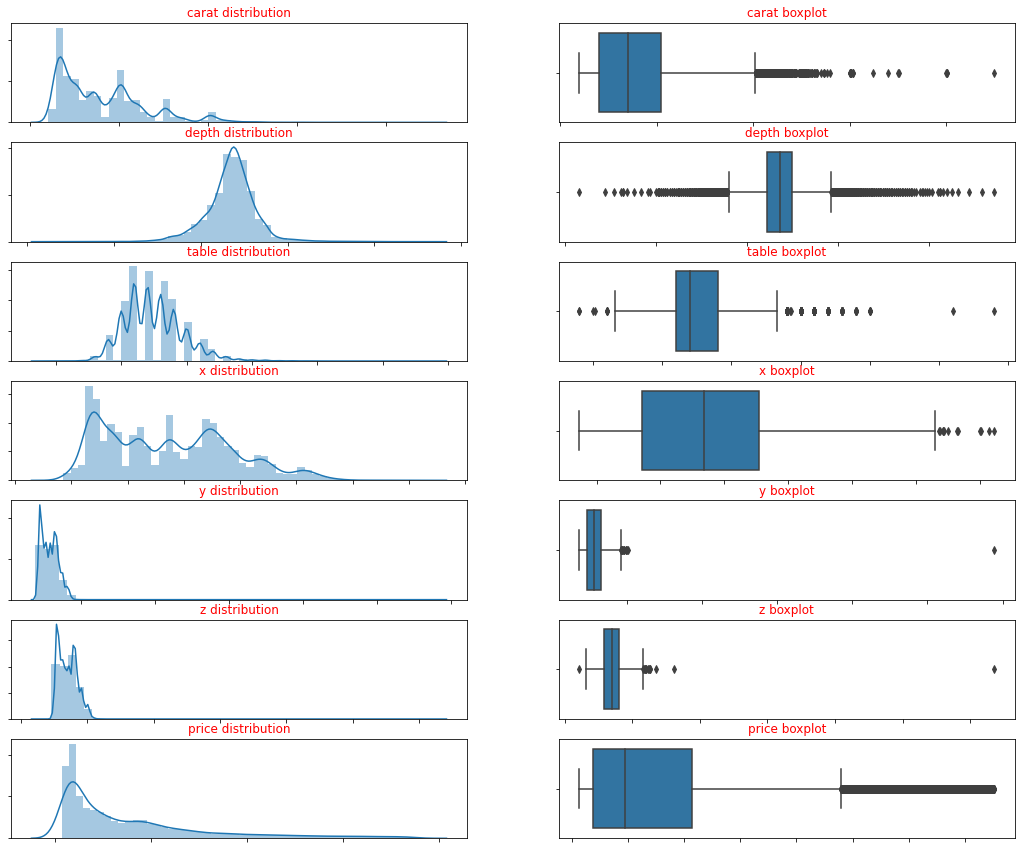

In [58]:
# histogram & boxplot for 7 numerical variables

fig,axes =  plt.subplots(7,2)
fig.set_size_inches(18,15)

x1 = df['carat']

a = sns.distplot(x1, ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('carat distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x1, ax = axes[0][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('carat boxplot',fontsize = 12,color = 'red')

x2 = df['depth']

a = sns.distplot(x2, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('depth distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x2, ax = axes[1][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('depth boxplot',fontsize = 12,color = 'red')

x3 = df['table']

a = sns.distplot(x3, ax = axes[2][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('table distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x3, ax = axes[2][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('table boxplot',fontsize = 12,color = 'red')

x4 = df['x']

a = sns.distplot(x4, ax = axes[3][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('x distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x4, ax = axes[3][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('x boxplot',fontsize = 12,color = 'red')

x5 = df['y']

a = sns.distplot(x5, ax = axes[4][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('y distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x5, ax = axes[4][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('y boxplot',fontsize = 12,color = 'red')

x6 = df['z']

a = sns.distplot(x6, ax = axes[5][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('z distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x6, ax = axes[5][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('z boxplot',fontsize = 12,color = 'red')

x7 = df['price']

a = sns.distplot(x7, ax = axes[6][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('price distribution',fontsize = 12, color = 'red')

a = sns.boxplot(x7, ax = axes[6][1],orient = 'v')
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('price boxplot',fontsize = 12,color = 'red')

__Insight3:__ 

In Univariate analysis(numerical variables), we have used __distribution plot and box plot__ and found:

- For __carat,table,x,y,z and price variables are not normally distributed__ where __depth variable has similar to normal distribution trend__
- All __seven variables__ have __outliers__ in the dataset. Let's not remove the outliers at this point in time.

In [59]:
df.skew() #it gives the details around skewness in the dataset.

carat    1.114789
depth   -0.019594
table    0.765805
x        0.401982
y        3.885771
z        2.637688
price    1.619116
dtype: float64

### Univariate Analysis (Categorical Variables)

#### Check the data types of all the variables and get the unique counts of all the 'Object' type variables.

In [60]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




Text(0.5, 1.0, 'clarity countplot')

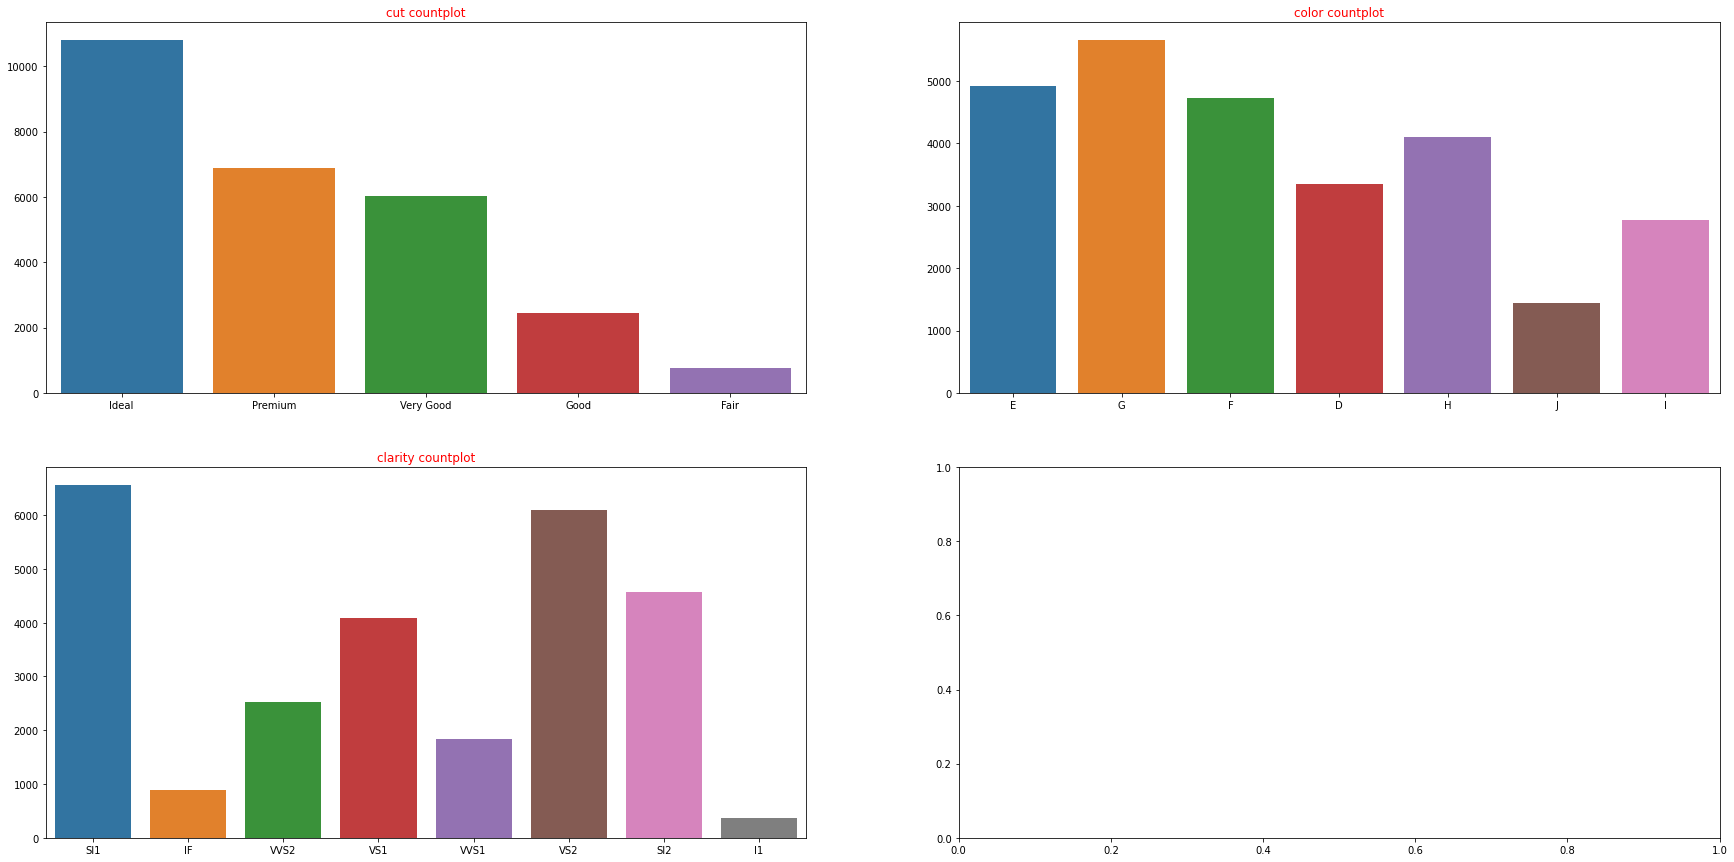

In [61]:
# countplot for 3 categorical variables

fig,axes =  plt.subplots(2,2)
fig.set_size_inches(30,15)

x1 = df['cut']

a = sns.countplot(x1, ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('cut countplot',fontsize = 12, color = 'red')

x2 = df['color']

a = sns.countplot(x2, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('color countplot',fontsize = 12, color = 'red')

x3 = df['clarity']

a = sns.countplot(x3, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('clarity countplot',fontsize = 12, color = 'red')

__Insight4:__ 

In Univariate analysis(categorial variables), we have used __count plot__ and found:

- __Cut type: Ideal__ has the highest count followed by premium, vary good, good and fair.
- __Color: G__ has the highest count followed by _E,F,H,D,I and J_.
- __Clarity: SI1__ has higher contribution followed by _VS2,SI2,VS1,VVS2,VVS1,IF and I1_.

### Bivariate Analysis (Numerical variables vs Numerical variables)¶

For Numeric vs Numeric Scatter plot and heat map are the options to go with

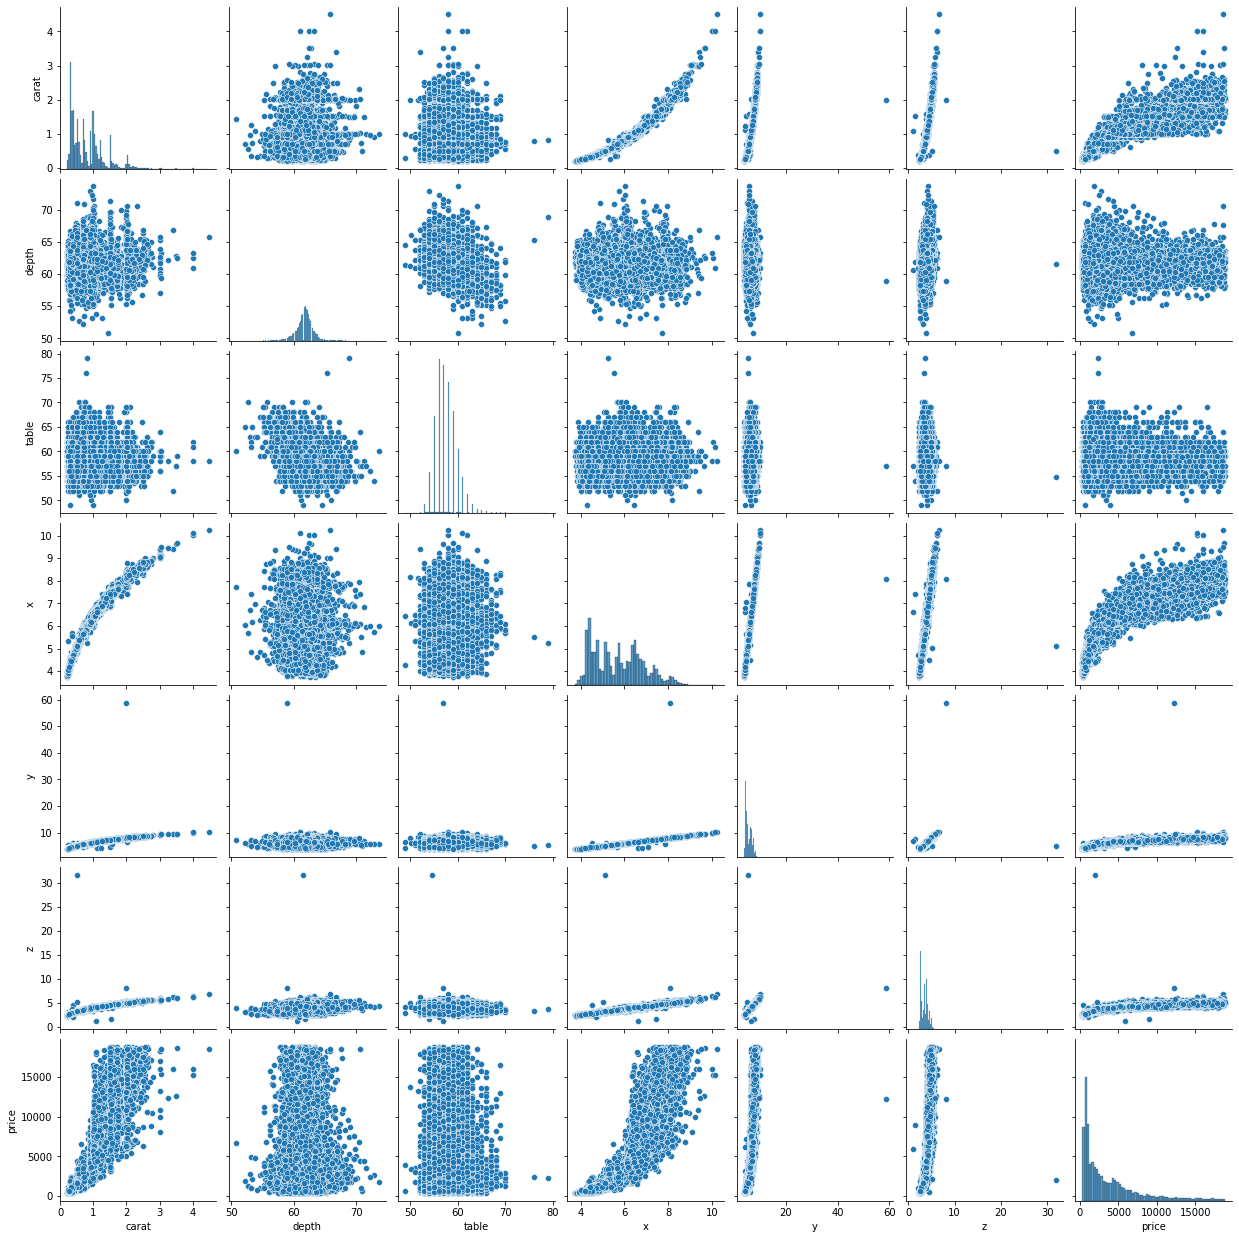

In [62]:
# scatter plot
sns.pairplot(df)

<AxesSubplot:>

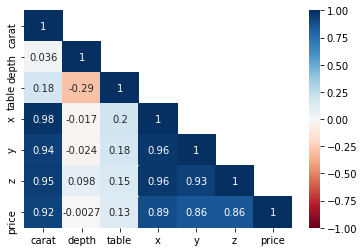

In [63]:
# Heatmap view
sns.heatmap(df[['carat', 'depth', 'table','x','y',
    'z', 'price']].corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',mask=np.triu(df[['carat', 'depth', 'table','x','y',
    'z', 'price']].corr(),+1))

__Insight5:__ 

In Bivariate analysis(Numerical variables), we have used __scatter plot & heatmap__ and found:

- In scatter plot and heat map both stats that __1) (x,y,z) & carat, 2) (x,y,z) & price and 3) carat & price__ variables have the quite a good +ve correlation __(more than 0.85)__ _(i.e. if one increases other also increases)_
- Other variables are not showing that strong relationship.

### Bivariate Analysis (Categorical variables vs Numerical variables)

For Categorical vs Numerical Violin plot, Box plot, strip plot and lmplot are the right option to go with

Text(0.5, 1.0, 'clarity to price violinplot')

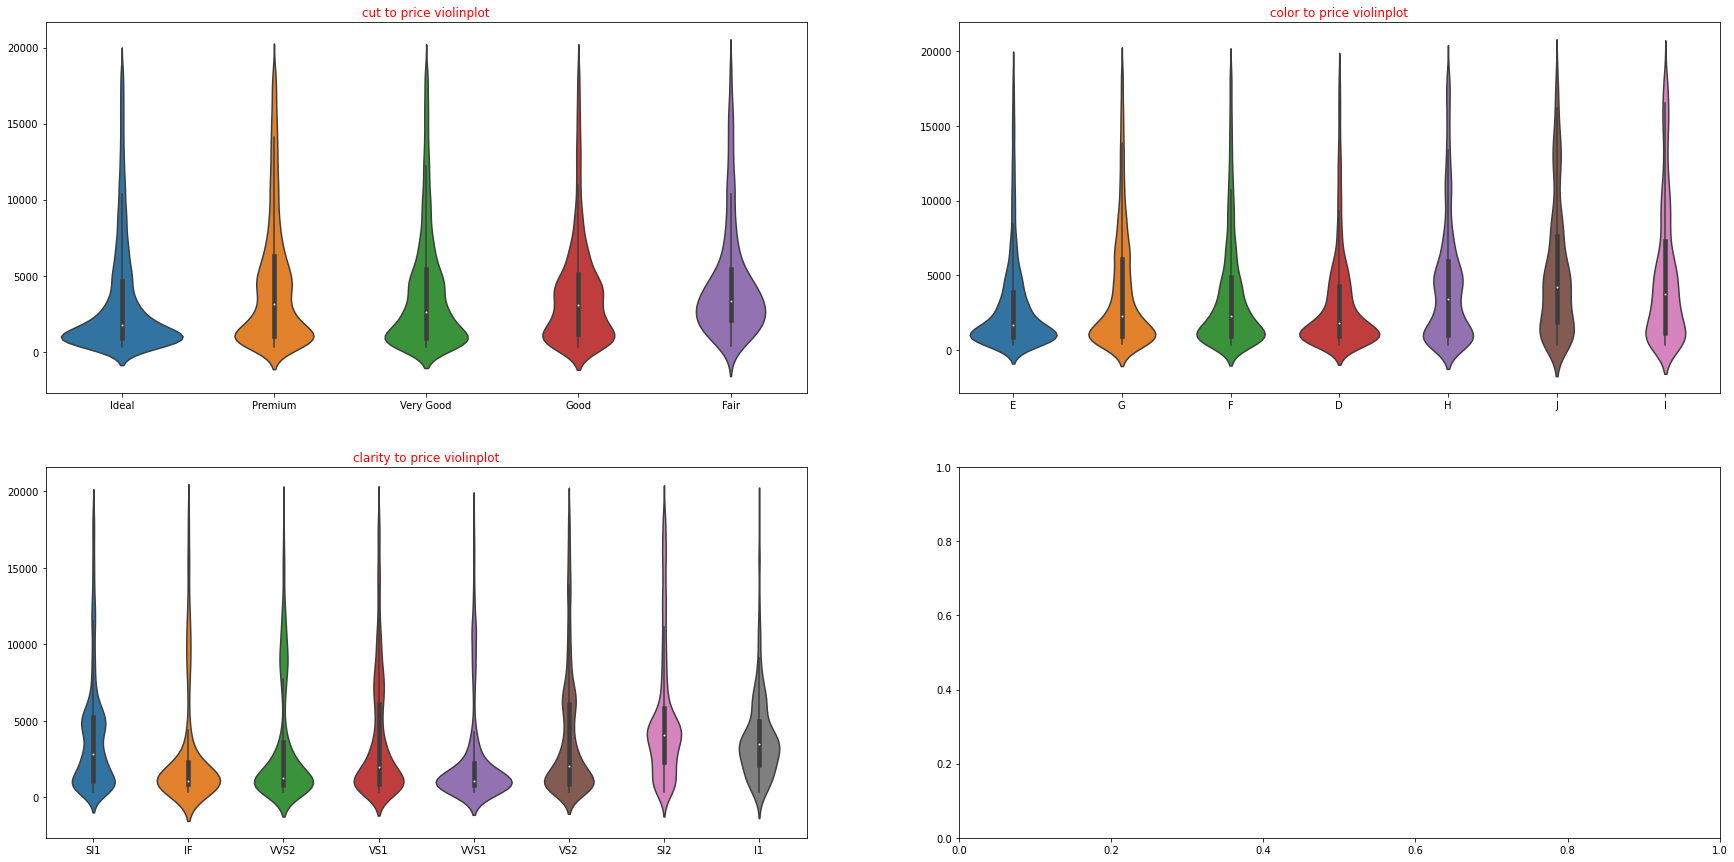

In [64]:
# violin plot for all categorical & numercial variables as "price"

fig,axes =  plt.subplots(2,2)
fig.set_size_inches(30,15)

y = df['price']
x1 = df['cut']

a = sns.violinplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('cut to price violinplot',fontsize = 12, color = 'red')

x2 = df['color']

a = sns.violinplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('color to price violinplot',fontsize = 12, color = 'red')

x3 = df['clarity']

a = sns.violinplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('clarity to price violinplot',fontsize = 12, color = 'red')

Text(0.5, 1.0, 'clarity to price boxplot')

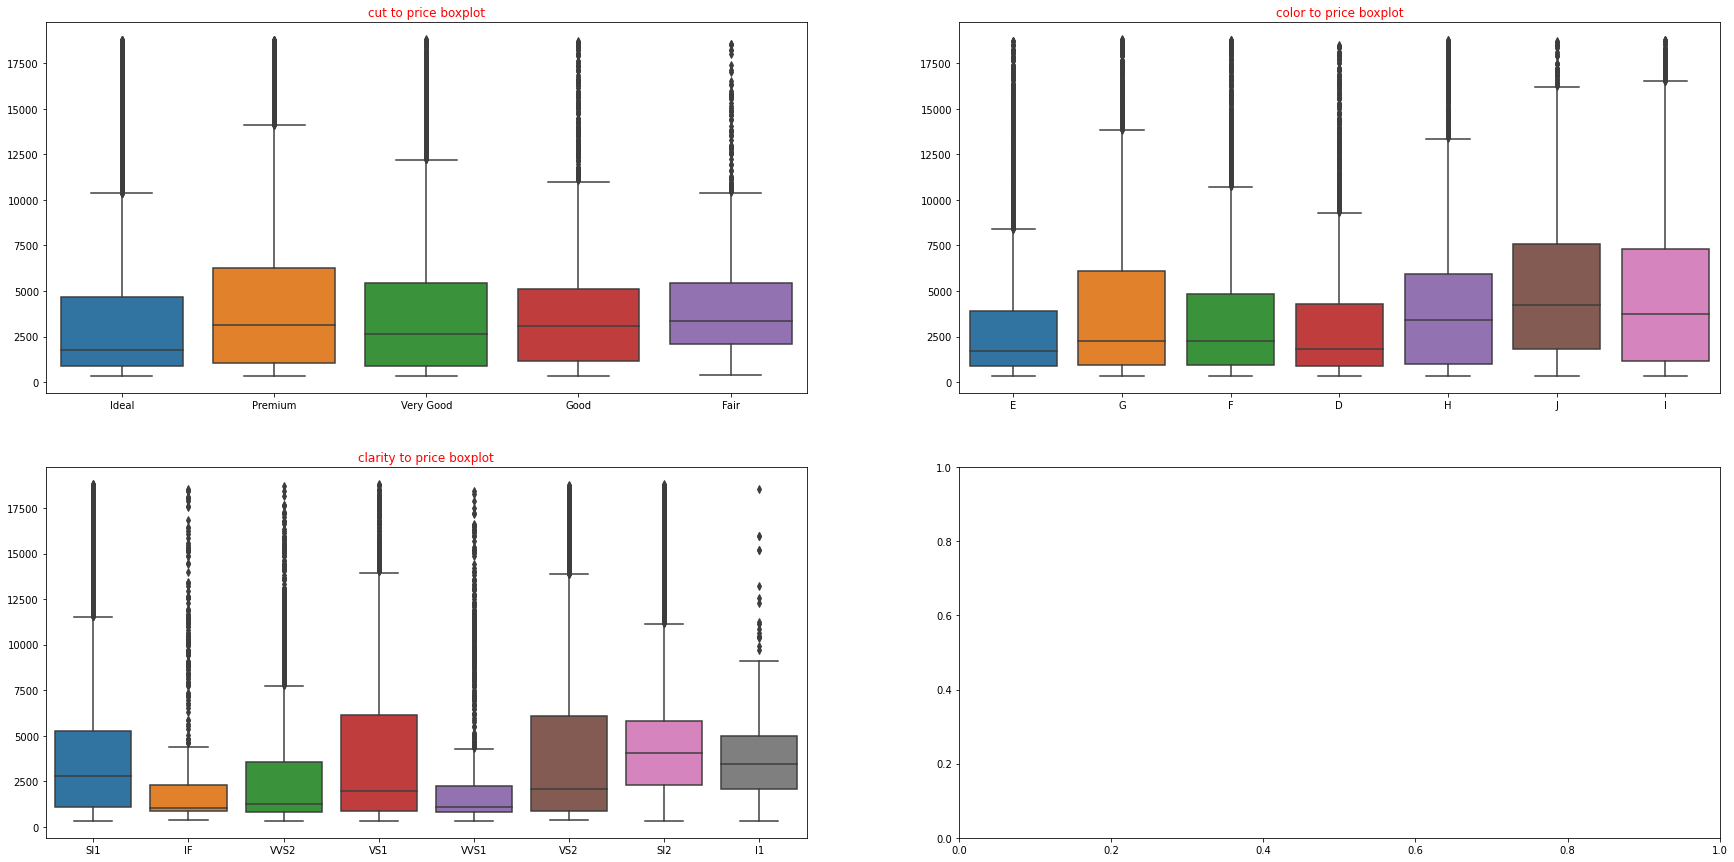

In [65]:
# box plot for all categorical & numercial variables as "price"

fig,axes =  plt.subplots(2,2)
fig.set_size_inches(30,15)

y = df['price']
x1 = df['cut']

a = sns.boxplot(x=x1, y=y,ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('cut to price boxplot',fontsize = 12, color = 'red')

x2 = df['color']

a = sns.boxplot(x=x2, y=y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('color to price boxplot',fontsize = 12, color = 'red')

x3 = df['clarity']

a = sns.boxplot(x=x3, y=y, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('clarity to price boxplot',fontsize = 12, color = 'red')

Text(0.5, 1.0, 'clarity to price stripplot')

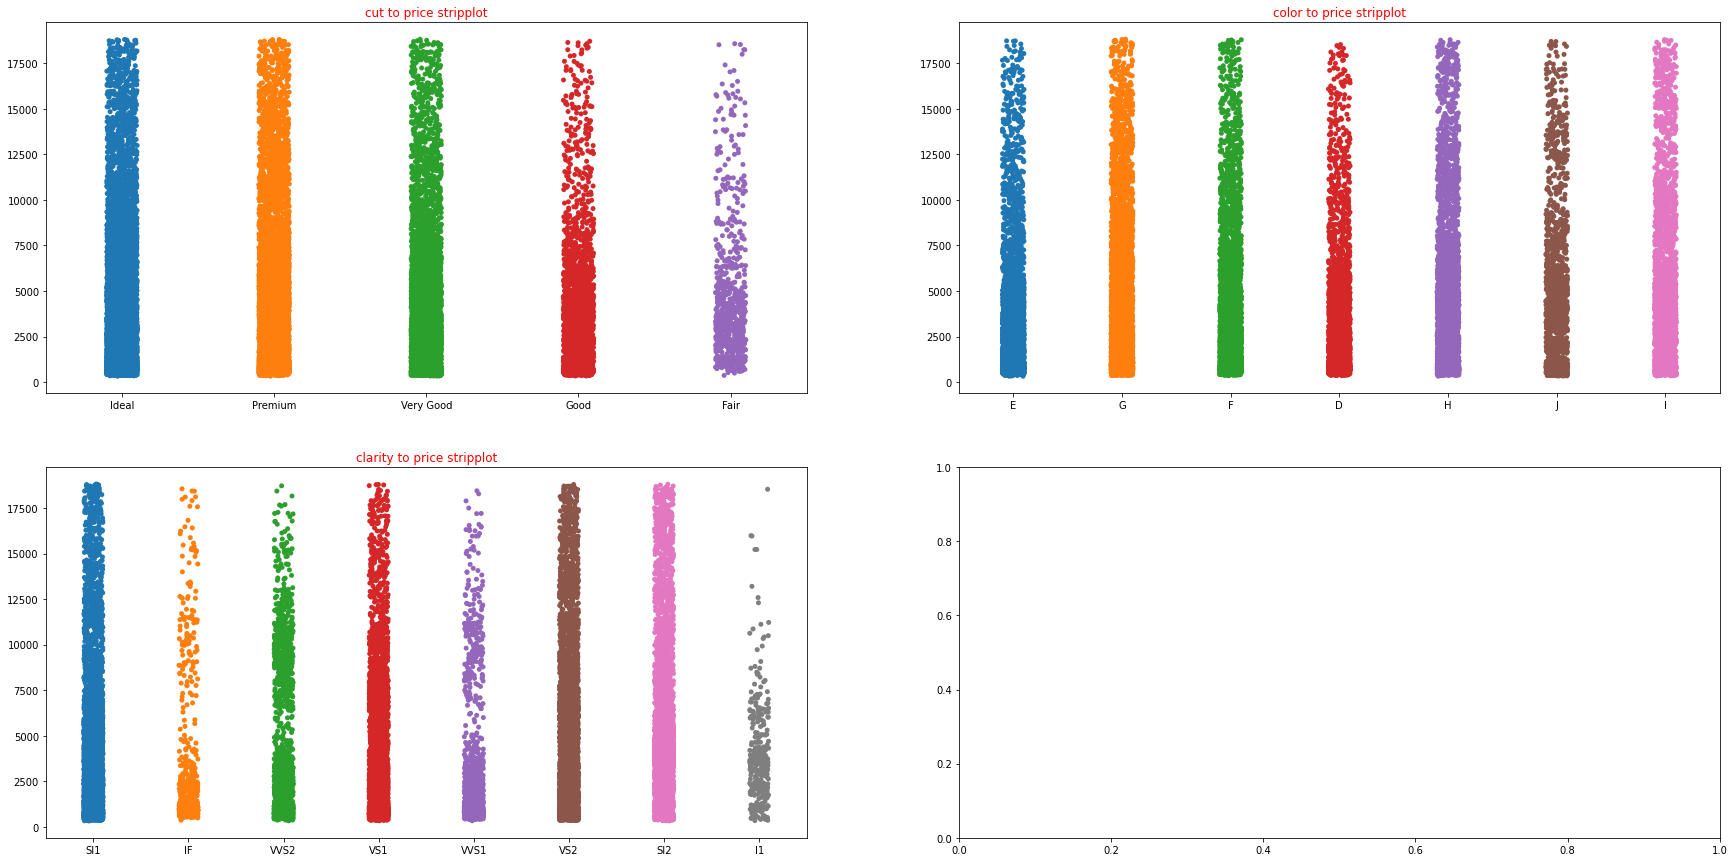

In [66]:
# strip plot for all categorical & numercial variables as "carat"

fig,axes =  plt.subplots(2,2)
fig.set_size_inches(30,15)

y = df['price']
x1 = df['cut']

a = sns.stripplot(x=x1, y=y,ax = axes[0][0],jitter=True)
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('cut to price stripplot',fontsize = 12, color = 'red')

x2 = df['color']

a = sns.stripplot(x=x2, y=y, ax = axes[0][1],jitter=True)
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('color to price stripplot',fontsize = 12, color = 'red')

x3 = df['clarity']

a = sns.stripplot(x=x3, y=y, ax = axes[1][0],jitter=True)
a.set(xlabel=None)
a.set(ylabel=None)
a.set_title('clarity to price stripplot',fontsize = 12, color = 'red')

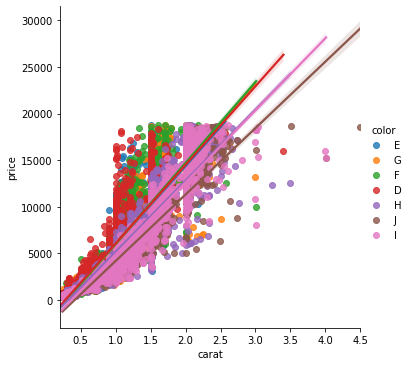

In [67]:
sns.lmplot(x='carat', y='price',hue='color',data=df)

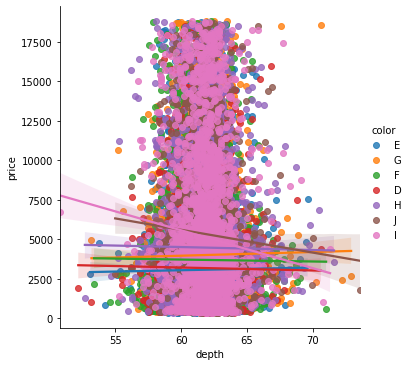

In [68]:
sns.lmplot(x='depth', y='price',hue='color',data=df)

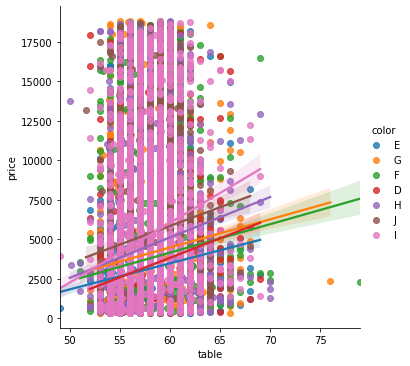

In [69]:
sns.lmplot(x="table", y="price",hue="color", data=df)

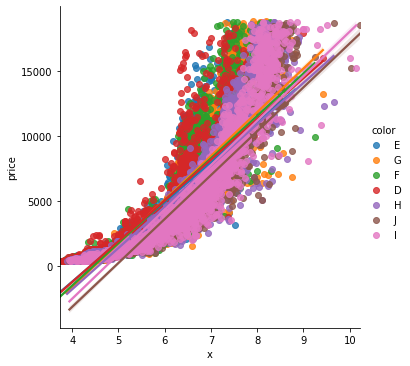

In [70]:
sns.lmplot(x="x", y="price",hue="color", data=df)

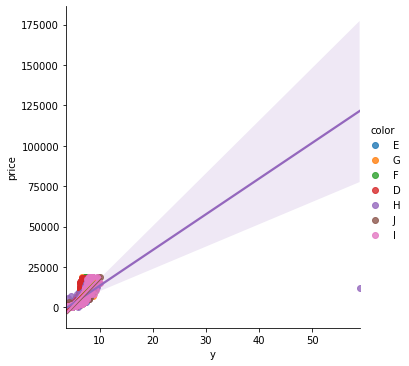

In [71]:
sns.lmplot(x="y", y="price",hue="color", data=df)

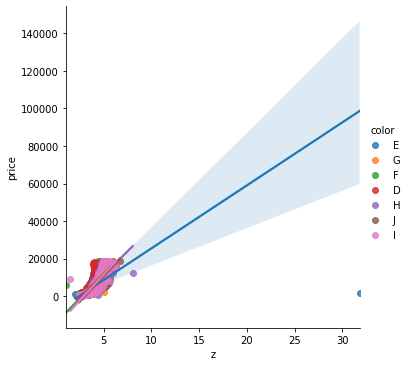

In [72]:
sns.lmplot(x="z", y="price",hue="color", data=df)

__Insight6:__ 

In Bivariate analysis(Categorical vs Numerical variables), we have used violin plot, box plot, strip plot & lm plot and compared __all categorical variables with price__ and found:

- __Median price across cut type except IDEAL cut type__ are __almost same__. _Further, price across the cut type are almost same_.
- __Median price across color__ are __almost same__. _Further, price across the color are almost same_.
- __Median price across clarity__ are __almost same__. _Further, price across the clarity are almost same except IJ1_.

## ------------------------     Question1 : EDA (Exploratory Data Analysis) ENDS ---------------------------

## Question2 : Build various iterations of the Linear Regression model using appropriate variable selection techniques for the full data.

#### Treat the object variables appropriately by either creating dummy variables (One-Hot Encoding) or coding it up in an ordinal manner.

In [73]:
## We are coding up the 'cut' variable in an ordinal manner

df['cut'] = np.where(df['cut'] =='Fair', '1', df['cut'])
df['cut'] = np.where(df['cut'] =='Good', '2', df['cut'])
df['cut'] = np.where(df['cut'] =='Very Good', '3', df['cut'])
df['cut'] = np.where(df['cut'] =='Premium', '4', df['cut'])
df['cut'] = np.where(df['cut'] =='Ideal', '5', df['cut'])

In [74]:
## We are coding up the 'clarity' variable in an ordinal manner

df['clarity'] = np.where(df['clarity'] =='I3', '1', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='I2', '2', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='I1', '3', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='SI2', '4', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='SI1', '5', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='VS2', '6', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='VS1', '7', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='VVS2', '8', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='VVS1', '9', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='IF', '10', df['clarity'])
df['clarity'] = np.where(df['clarity'] =='FL', '11', df['clarity'])

In [75]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,E,5,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,G,10,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,E,8,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,F,7,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,F,9,60.4,59.0,4.35,4.43,2.65,779


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [77]:
## Converting the cut & clarity variable to numeric

df['cut'] = df['cut'].astype('int')
df['clarity'] = df['clarity'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int32(2), int64(1), object(1)
memory usage: 3.1+ MB


In [78]:
## Converting the other 'object' type variables as dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,5,5,62.1,58.0,4.27,4.29,2.66,499,1,0,0,0,0,0
1,0.33,4,10,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0
2,0.90,3,8,62.2,60.0,6.04,6.12,3.78,6289,1,0,0,0,0,0
3,0.42,5,7,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,0
4,0.31,5,9,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,0


In [79]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   clarity  26933 non-null  int32  
 3   depth    26933 non-null  float64
 4   table    26933 non-null  float64
 5   x        26933 non-null  float64
 6   y        26933 non-null  float64
 7   z        26933 non-null  float64
 8   price    26933 non-null  int64  
 9   color_E  26933 non-null  uint8  
 10  color_F  26933 non-null  uint8  
 11  color_G  26933 non-null  uint8  
 12  color_H  26933 non-null  uint8  
 13  color_I  26933 non-null  uint8  
 14  color_J  26933 non-null  uint8  
dtypes: float64(6), int32(2), int64(1), uint8(6)
memory usage: 3.0 MB


In [80]:
df_dummy.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [81]:
df_final = df_dummy.copy()

### Data Scaling & Model building

In [82]:
df_dummy.head()

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,5,5,62.1,58.0,4.27,4.29,2.66,499,1,0,0,0,0,0
1,0.33,4,10,60.8,58.0,4.42,4.46,2.70,984,0,0,1,0,0,0
2,0.90,3,8,62.2,60.0,6.04,6.12,3.78,6289,1,0,0,0,0,0
3,0.42,5,7,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,0,0,0
4,0.31,5,9,60.4,59.0,4.35,4.43,2.65,779,0,1,0,0,0,0


In [83]:
#data scaling using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['carat','depth','table','x','y','z','price']
df_dummy[num_vars] = scaler.fit_transform(df_dummy[num_vars])
df_dummy.head(2)

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
0,0.023256,5,5,0.495614,0.3,0.083077,0.010509,0.051741,0.009355,1,0,0,0,0,0
1,0.030233,4,10,0.438596,0.3,0.106154,0.013589,0.053043,0.035583,0,0,1,0,0,0


In [84]:
# identify dependent variables and independent variables and put it into Y and X dataset respectively.

X = df_dummy.drop('price', axis =1)

Y = df_dummy.pop('price')

In [85]:
X.head()

,carat,cut,clarity,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,0.023256,5,5,0.495614,0.300000,0.083077,0.010509,0.051741,1,0,0,0,0,0
1,0.030233,4,10,0.438596,0.300000,0.106154,0.013589,0.053043,0,0,1,0,0,0
2,0.162791,3,8,0.500000,0.366667,0.355385,0.043667,0.088187,1,0,0,0,0,0
3,0.051163,5,7,0.473684,0.233333,0.167692,0.019750,0.061503,0,1,0,0,0,0
4,0.025581,5,9,0.421053,0.333333,0.095385,0.013046,0.051416,0,1,0,0,0,0


In [86]:
Y.head()

0    0.009355
1    0.035583
2    0.322464
3    0.040883
4    0.024497
Name: price, dtype: float64

In [87]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

#### Building model using statsmodel, for the detailed statistics

In [89]:
X_new = X.copy()
X_new.head()

,carat,cut,clarity,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,0.023256,5,5,0.495614,0.300000,0.083077,0.010509,0.051741,1,0,0,0,0,0
1,0.030233,4,10,0.438596,0.300000,0.106154,0.013589,0.053043,0,0,1,0,0,0
2,0.162791,3,8,0.500000,0.366667,0.355385,0.043667,0.088187,1,0,0,0,0,0
3,0.051163,5,7,0.473684,0.233333,0.167692,0.019750,0.061503,0,1,0,0,0,0
4,0.025581,5,9,0.421053,0.333333,0.095385,0.013046,0.051416,0,1,0,0,0,0


In [90]:
def build_model(X,Y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(Y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### MODEL 1

In [91]:
#X_new = build_model(X_rfe,Y)
X_new = build_model(X_new,Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.969e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:52   Log-Likelihood:                 35453.
No. Observations:               26933   AIC:                        -7.088e+04
Df Residuals:                   26918   BIC:                        -7.075e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1334      0.007    -19.862      0.0

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).¶

In [92]:
#Calculating the Variance Inflation Factor
checkVIF(X_new)

,Features,VIF
0,const,288.72
6,x,48.33
1,carat,25.20
8,z,16.08
7,y,13.87
11,color_G,2.20
9,color_E,2.03
10,color_F,2.02
12,color_H,1.95
13,color_I,1.73


p-vale of `z` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [93]:
X_new = X_new.drop(["z"], axis = 1)

#### MODEL 2

In [94]:
X_new = build_model(X_new,Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:53   Log-Likelihood:                 35452.
No. Observations:               26933   AIC:                        -7.088e+04
Df Residuals:                   26919   BIC:                        -7.076e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1352      0.007    -20.598      0.0

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).¶

In [95]:
#Calculating the Variance Inflation Factor
checkVIF(X_new)

,Features,VIF
0,const,275.51
6,x,37.16
1,carat,25.19
7,y,13.64
10,color_G,2.20
8,color_E,2.03
9,color_F,2.02
11,color_H,1.95
12,color_I,1.73
5,table,1.60


p-vale of `y` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [96]:
X_new = X_new.drop(["y"], axis = 1)

#### MODEL 3

In [97]:
X_new = build_model(X_new,Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:53   Log-Likelihood:                 35452.
No. Observations:               26933   AIC:                        -7.088e+04
Df Residuals:                   26920   BIC:                        -7.077e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1348      0.007    -20.569      0.0

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).¶

In [98]:
#Calculating the Variance Inflation Factor
checkVIF(X_new)

,Features,VIF
0,const,274.77
6,x,25.38
1,carat,25.17
9,color_G,2.20
7,color_E,2.03
8,color_F,2.02
10,color_H,1.95
11,color_I,1.73
5,table,1.60
2,cut,1.50


dropping `x` because of high VIF value. (shows that x has high multicollinearity.)

In [99]:
X_new = X_new.drop(["x"], axis = 1)

#### MODEL 4

In [100]:
X_new = build_model(X_new,Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.407e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:53   Log-Likelihood:                 34957.
No. Observations:               26933   AIC:                        -6.989e+04
Df Residuals:                   26921   BIC:                        -6.979e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2074      0.006    -33.142      0.0

#### Check for multicollinearity in the predictor variables using Variance Inflation Factor (VIF).¶

In [101]:
#Calculating the Variance Inflation Factor
checkVIF(X_new)

,Features,VIF
0,const,241.35
8,color_G,2.20
6,color_E,2.03
7,color_F,2.01
9,color_H,1.95
10,color_I,1.73
5,table,1.60
2,cut,1.50
11,color_J,1.43
4,depth,1.32


#### Residual, Prediction & Evaluation of Model

In [102]:
lm = sm.OLS(Y,X_new).fit()
Y_pred = lm.predict(X_new)

In [103]:
Y_pred

0       -0.043627
1        0.087579
2        0.310183
3        0.066770
4        0.067749
           ...   
26962    0.318621
26963    0.070000
26964    0.079078
26965    0.009550
26966    0.293066
Length: 26933, dtype: float64

Text(0.5, 0, 'Errors')

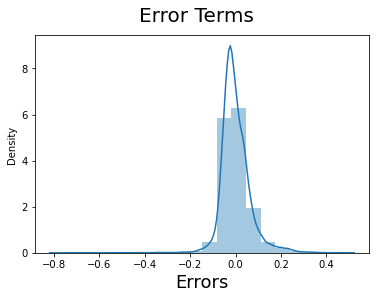

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y - Y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [105]:
from sklearn.metrics import r2_score 
accuracy_fulldata = r2_score(Y, Y_pred)
accuracy_fulldata

0.9077137570747361

Text(0, 0.5, 'Y_pred')

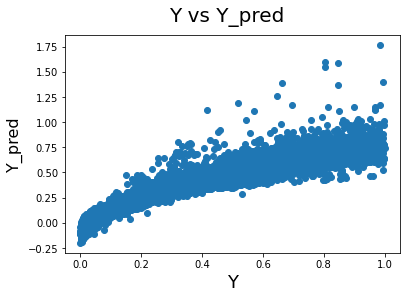

In [106]:
#EVALUATION OF THE MODEL
# Plotting Y and Y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y,Y_pred)
fig.suptitle('Y vs Y_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y', fontsize=18)                          # X-label
plt.ylabel('Y_pred', fontsize=16)

In [107]:
#Model evaluation
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.407e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:54   Log-Likelihood:                 34957.
No. Observations:               26933   AIC:                        -6.989e+04
Df Residuals:                   26921   BIC:                        -6.979e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2074      0.006    -33.142      0.0

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [109]:
MSE_fulldata = mean_squared_error(Y, Y_pred)
MSE_fulldata

0.004366730355127467

In [110]:
RMSE_fulldata = np.sqrt(MSE_fulldata)
RMSE_fulldata

0.06608124056891991

In [111]:
pd.options.display.float_format = "{:,.3f}".format
comparison = pd.DataFrame({'Full Data' : [accuracy_fulldata,MSE_fulldata,RMSE_fulldata]},
                          index = ['Accuracy', 'MSE', 'RMSE'])
comparison

,Full Data
Accuracy,0.908
MSE,0.004
RMSE,0.066


__Insights:__

1. `carat`, `cut`, `clarity`, `color`, `depth` and `table` are the significant variable to predict `price` variable.
2. *R-sqaured and Adjusted R-squared (extent of fit)* - __0.908 and 0.908__ - __`~91%`__ variance explained.
3. *F-stats and Prob(F-stats) (overall model fit)* - __2.407e+04 and 0.00__ - _Model is significant and explained __`~91%`__ variance is just not by chance._
4. *p-values* - p-values for all the coefficients seem to be __less than the significance level of 0.05.__ - meaning that all the predictors are statistically significant.
5. *Model Metrics* 

         - MSE       : 0.004
         - RMSE      : 0.066



## ------------------------     Question2 : Model building FULL DATA ENDS ---------------------------

## Question3 : Split the data into training (70%) and test (30%). Build the various iterations of the Linear Regression models on the training data and use those models to predict on the test data using appropriate model evaluation metrics.

### Train-Test Split and Data Scaling
#### Splitting data into training and test set (test_size=.30, random_state=1)

In [112]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [113]:
# Checking the dimensions of the training and test data

print('df_train:',df_train.shape)
print('df_test:',df_test.shape)
print('Total Count:',df_dummy.shape[0])

df_train: (18853, 15)
df_test: (8080, 15)
Total Count: 26933


In [114]:
df_train.head(2)

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
3211,2.090,5,4,60.600,57.000,8.300,8.200,5.000,16703,0,0,0,1,0,0
1962,0.590,2,5,63.700,56.000,5.320,5.350,3.400,1694,0,0,0,0,0,0


In [115]:
#data scaling using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['carat','depth','table','x','y','z','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head(2)

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
3211,0.440,5,4,0.443,0.267,0.703,0.081,0.128,0.886,0,0,0,1,0,0
1962,0.091,2,5,0.584,0.233,0.245,0.030,0.076,0.074,0,0,0,0,0,0


In [116]:
#Dividing data into X and y variables
Y_train = df_train.pop('price')
X_train = df_train

In [117]:
X_train.head(2)

,carat,cut,clarity,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
3211,0.440,5,4,0.443,0.267,0.703,0.081,0.128,0,0,0,1,0,0
1962,0.091,2,5,0.584,0.233,0.245,0.030,0.076,0,0,0,0,0,0


In [118]:
Y_train.head(2)

3211   0.886
1962   0.074
Name: price, dtype: float64

In [119]:
X_train_new = X_train.copy()

#### MODEL 1

In [120]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.364e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:54   Log-Likelihood:                 24736.
No. Observations:               18853   AIC:                        -4.944e+04
Df Residuals:                   18838   BIC:                        -4.932e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1304      0.008    -16.296      0.0

p-vale of `y` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [121]:
X_train_new = X_train_new.drop(["y"], axis = 1)

#### MODEL 2

In [122]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:54   Log-Likelihood:                 24736.
No. Observations:               18853   AIC:                        -4.944e+04
Df Residuals:                   18839   BIC:                        -4.933e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1303      0.008    -16.289      0.0

p-vale of `z` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [123]:
X_train_new = X_train_new.drop(["z"], axis = 1)

#### MODEL 3

In [124]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 1.592e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:54   Log-Likelihood:                 24735.
No. Observations:               18853   AIC:                        -4.944e+04
Df Residuals:                   18840   BIC:                        -4.934e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1318      0.008    -16.783      0.0

In [125]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,273.880
6,x,25.190
1,carat,25.020
9,color_G,2.230
7,color_E,2.040
8,color_F,2.020
10,color_H,1.960
11,color_I,1.720
5,table,1.570
2,cut,1.490


dropping `x` because of high VIF value. (shows that x has high multicollinearity.)

In [126]:
X_train_new = X_train_new.drop(["x"], axis = 1)

#### MODEL 4

In [127]:
X_train_new = build_model(X_train_new,Y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.673e+04
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:39:55   Log-Likelihood:                 24417.
No. Observations:               18853   AIC:                        -4.881e+04
Df Residuals:                   18841   BIC:                        -4.872e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2026      0.007    -27.109      0.0

In [128]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,239.560
8,color_G,2.220
6,color_E,2.040
7,color_F,2.020
9,color_H,1.960
10,color_I,1.720
5,table,1.570
2,cut,1.490
11,color_J,1.430
4,depth,1.320


### Residual, Prediction & Evaluation of Model

#### Prediction on Training Data

In [129]:
# Prediction on Training data
lm = sm.OLS(Y_train,X_train_new).fit()
Y_train_pred = lm.predict(X_train_new)

In [130]:
Y_train_pred

3211    0.748
1962    0.087
19698   0.140
2719    0.600
15179   0.095
         ... 
12126   0.037
24451   0.017
14157   0.214
23345   0.255
5641    0.034
Length: 18853, dtype: float64

Text(0.5, 0, 'Errors : Training Data')

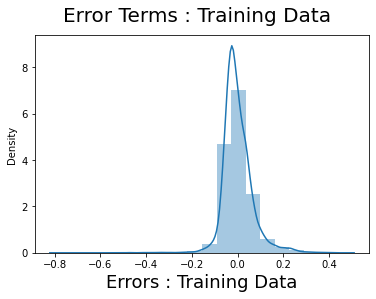

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms : Training Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors : Training Data', fontsize = 18) 

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [132]:
from sklearn.metrics import r2_score 
accuracy_traindata = r2_score(Y_train, Y_train_pred)
accuracy_traindata

0.907146163829093

Text(0, 0.5, 'Y_train_pred')

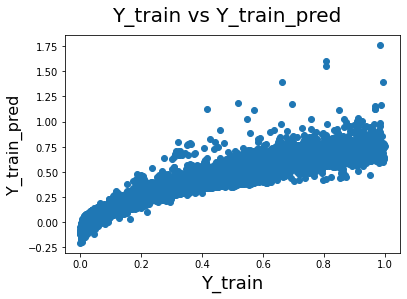

In [133]:
#EVALUATION OF THE MODEL
# Plotting Y_train and Y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_train,Y_train_pred)
fig.suptitle('Y_train vs Y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_train', fontsize=18)                          # X-label
plt.ylabel('Y_train_pred', fontsize=16)

In [134]:
MSE_traindata = mean_squared_error(Y_train, Y_train_pred)
MSE_traindata

0.004391201184753229

In [135]:
RMSE_traindata = np.sqrt(MSE_traindata)
RMSE_traindata

0.06626613905120193

In [136]:
MAE_traindata = mean_absolute_error(Y_train, Y_train_pred)
MAE_traindata

0.045992631095252166

In [137]:
pd.options.display.float_format = "{:,.4f}".format
comparison = pd.DataFrame({'Full Data' : [accuracy_fulldata,MSE_fulldata,RMSE_fulldata],
                           'Training Data' : [accuracy_traindata,MSE_traindata,RMSE_traindata]},
                           index = ['Accuracy', 'MSE', 'RMSE'])
comparison

,Full Data,Training Data
Accuracy,0.9077,0.9071
MSE,0.0044,0.0044
RMSE,0.0661,0.0663


#### Prediction on Test Data

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['carat','depth','table','x','y','z','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head(2)

,carat,cut,clarity,depth,table,x,y,z,price,color_E,color_F,color_G,color_H,color_I,color_J
5478,0.0765,4,3,0.4673,0.4211,0.2019,0.2029,0.3368,0.0366,0,0,1,0,0,0
5347,0.0237,4,6,0.4953,0.4211,0.0743,0.0779,0.2406,0.0307,0,0,0,0,0,0


In [139]:
#Dividing data into X and y variables
Y_test = df_test.pop('price')
X_test = df_test

In [140]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [141]:
# Prediction on Training data
Y_test_pred = lm.predict(X_test_new)

In [142]:
Y_test_pred

5478    -0.0171
5347    -0.0132
16648    0.1067
6630     0.1975
11947    0.0276
          ...  
3811     0.0069
26828    0.0871
668      0.6687
5295     0.3267
19282    0.0730
Length: 8080, dtype: float64

Text(0.5, 0, 'Errors : Test Data')

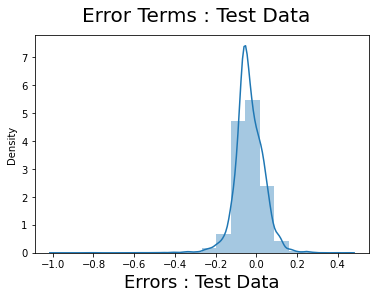

In [143]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_test - Y_test_pred), bins = 20)
fig.suptitle('Error Terms : Test Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors : Test Data', fontsize = 18) 

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [144]:
from sklearn.metrics import r2_score 
accuracy_testdata = r2_score(Y_test, Y_test_pred)
accuracy_testdata

0.865188085526363

Text(0, 0.5, 'Y_test_pred')

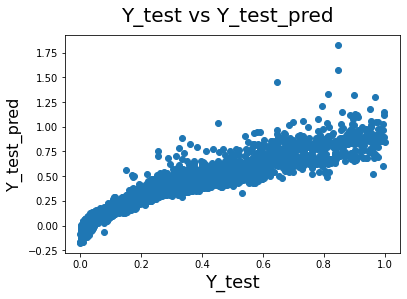

In [145]:
#EVALUATION OF THE MODEL
# Plotting Y_train and Y_train_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test_pred)
fig.suptitle('Y_test vs Y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Y_test_pred', fontsize=16)

In [146]:
MSE_testdata = mean_squared_error(Y_test, Y_test_pred)
MSE_testdata

0.006422022419657556

In [147]:
RMSE_testdata = np.sqrt(MSE_testdata)
RMSE_testdata

0.08013752192111731

In [148]:
MAE_testdata = mean_absolute_error(Y_test, Y_test_pred)
MAE_testdata

0.06123308527211573

__Insights:__

1. `carat`, `cut`, `clarity`, `color`, `depth` and `table` are the significant variable to predict `price` variable.
2. *R-sqaured for training data* - __0.907__ - __`~91%`__ variance explained and *R-sqaured for test data* - __0.865__ - __`~87%`__ variance explained.
3. *p-values* - p-values for all the coefficients seem to be __less than the significance level of 0.05.__ - meaning that all the predictors are statistically significant.
4. *Model Metrics: Training Data* 

         - MSE       : 0.0044
         - RMSE      : 0.0663
         
5. *Model Metrics: Test Data* 

         - MSE       : 0.0064
         - RMSE      : 0.0801


In [149]:
pd.options.display.float_format = "{:,.4f}".format
comparison = pd.DataFrame({'Full Data' : [accuracy_fulldata,MSE_fulldata,RMSE_fulldata],
                           'Training Data' : [accuracy_traindata,MSE_traindata,RMSE_traindata],
                           'Test Data' : [accuracy_testdata,MSE_testdata,RMSE_testdata]},
                           index = ['Accuracy', 'MSE', 'RMSE'])
comparison

,Full Data,Training Data,Test Data
Accuracy,0.9077,0.9071,0.8652
MSE,0.0044,0.0044,0.0064
RMSE,0.0661,0.0663,0.0801


## Based on above table, we can conclude that:
    
### Full dataset have higher accuracy and lower RMSE score compare to train and test dataset.